In [1]:
from prophet import Prophet
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Data/DOM/Load Actuals/Processed/Aggregated/load.csv', parse_dates=['DATE'])
df.rename(columns={'DATE': 'ds','MW':'y'},inplace=True)

In [3]:
m = Prophet()
m.fit(df)

In [4]:
future = m.make_future_dataframe(periods=8760, freq='H')
future.tail()

,ds
96403,2020-12-30 19:00:00
96404,2020-12-30 20:00:00
96405,2020-12-30 21:00:00
96406,2020-12-30 22:00:00
96407,2020-12-30 23:00:00


In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
96403,2020-12-30 19:00:00,14282.630786,10300.963582,18354.368420
96404,2020-12-30 20:00:00,13972.345762,9714.553084,18043.517110
96405,2020-12-30 21:00:00,13390.622375,9453.763673,17324.250460
96406,2020-12-30 22:00:00,12661.948002,8668.038900,16272.782939
96407,2020-12-30 23:00:00,11938.834726,7960.604687,15775.217434


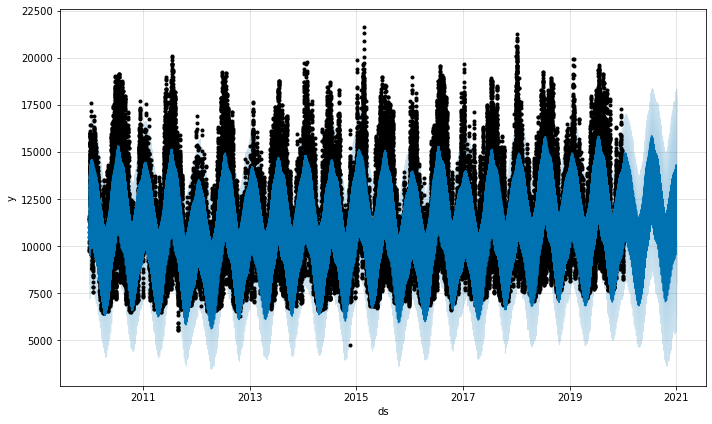

In [6]:
fig1 = m.plot(forecast)

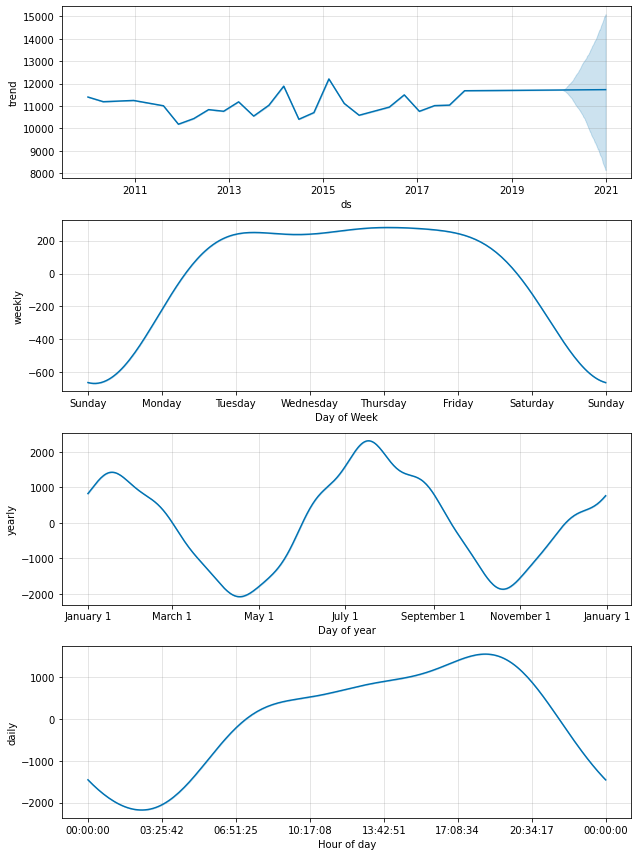

In [7]:
fig2 = m.plot_components(forecast)

In [8]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01 00:00:00,11399.444511,8945.088796,13022.112613,11399.444511,11399.444511,-400.198682,-400.198682,-400.198682,-1455.413296,...,243.673469,243.673469,243.673469,811.541146,811.541146,811.541146,0.0,0.0,0.0,10999.245829
1,2010-01-01 01:00:00,11399.369996,8461.070000,12700.607454,11399.369996,11399.369996,-849.701308,-849.701308,-849.701308,-1902.243087,...,238.949920,238.949920,238.949920,813.591859,813.591859,813.591859,0.0,0.0,0.0,10549.668688
2,2010-01-01 02:00:00,11399.295481,8215.271038,12509.445233,11399.295481,11399.295481,-1097.818073,-1097.818073,-1097.818073,-2147.110593,...,233.647132,233.647132,233.647132,815.645388,815.645388,815.645388,0.0,0.0,0.0,10301.477409
3,2010-01-01 03:00:00,11399.220967,8160.507518,12398.010063,11399.220967,11399.220967,-1096.731159,-1096.731159,-1096.731159,-2142.139350,...,227.706491,227.706491,227.706491,817.701700,817.701700,817.701700,0.0,0.0,0.0,10302.489808
4,2010-01-01 04:00:00,11399.146452,8491.869737,12574.344652,11399.146452,11399.146452,-814.775482,-814.775482,-814.775482,-1855.605003,...,221.068762,221.068762,221.068762,819.760760,819.760760,819.760760,0.0,0.0,0.0,10584.370970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96403,2020-12-30 19:00:00,11729.040739,10300.963582,18354.368420,8140.898009,15094.595483,2553.590047,2553.590047,2553.590047,1511.976214,...,276.385146,276.385146,276.385146,765.228688,765.228688,765.228688,0.0,0.0,0.0,14282.630786
96404,2020-12-30 20:00:00,11729.042570,9714.553084,18043.517110,8140.381832,15095.130912,2243.303192,2243.303192,2243.303192,1198.595724,...,277.501930,277.501930,277.501930,767.205537,767.205537,767.205537,0.0,0.0,0.0,13972.345762
96405,2020-12-30 21:00:00,11729.044402,9453.763673,17324.250460,8139.865655,15095.666340,1661.577973,1661.577973,1661.577973,613.966068,...,278.425962,278.425962,278.425962,769.185943,769.185943,769.185943,0.0,0.0,0.0,13390.622375
96406,2020-12-30 22:00:00,11729.046233,8668.038900,16272.782939,8139.349478,15096.201769,932.901769,932.901769,932.901769,-117.425122,...,279.157017,279.157017,279.157017,771.169874,771.169874,771.169874,0.0,0.0,0.0,12661.948002


In [9]:
import datetime

start_date_mask = df['ds'].dt.date >= datetime.date(2019, 1, 1)
end_date_mask = df['ds'].dt.date < datetime.date(2019, 3, 8)
df_subset = df[start_date_mask & end_date_mask]

def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

train, test = train_test_split(df_subset, 168)

In [10]:
m = Prophet()
m.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [11]:
future = m.make_future_dataframe(periods=168, freq='H')

In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1579,2019-03-07 19:00:00,12538.358779,10407.243458,14522.335576
1580,2019-03-07 20:00:00,12265.481573,10067.959277,14077.782044
1581,2019-03-07 21:00:00,11717.766822,9771.339397,13575.750541
1582,2019-03-07 22:00:00,11159.961385,9122.602695,13120.569339
1583,2019-03-07 23:00:00,10751.269970,8775.573663,12786.129873


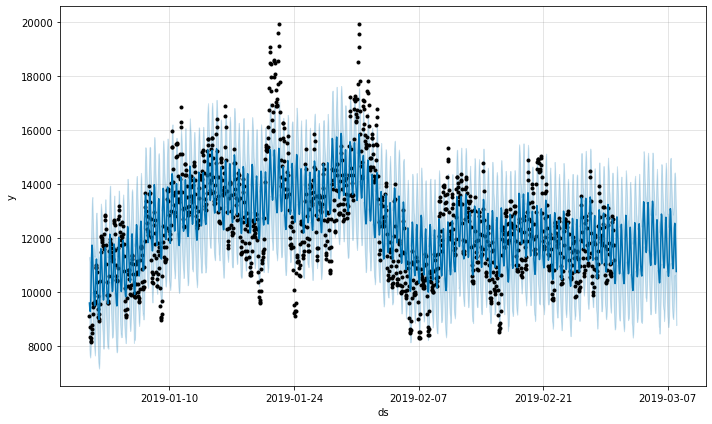

In [36]:
fig3 = m.plot(forecast)

In [18]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01 00:00:00,9878.365377,7742.041989,11399.728791,9878.365377,9878.365377,-294.144934,-294.144934,-294.144934,-887.341520,-887.341520,-887.341520,593.196586,593.196586,593.196586,0.0,0.0,0.0,9584.220443
1,2019-01-01 01:00:00,9891.673141,7669.751614,11152.476770,9891.673141,9891.673141,-504.193991,-504.193991,-504.193991,-1077.950971,-1077.950971,-1077.950971,573.756980,573.756980,573.756980,0.0,0.0,0.0,9387.479150
2,2019-01-01 02:00:00,9904.980904,7380.031491,11080.761570,9904.980904,9904.980904,-627.542180,-627.542180,-627.542180,-1178.834170,-1178.834170,-1178.834170,551.291990,551.291990,551.291990,0.0,0.0,0.0,9277.438724
3,2019-01-01 03:00:00,9918.288668,7745.592346,11074.529855,9918.288668,9918.288668,-515.753431,-515.753431,-515.753431,-1041.826464,-1041.826464,-1041.826464,526.073033,526.073033,526.073033,0.0,0.0,0.0,9402.535237
4,2019-01-01 04:00:00,9931.596431,8048.889853,11607.714024,9931.596431,9931.596431,-49.970273,-49.970273,-49.970273,-548.366477,-548.366477,-548.366477,498.396204,498.396204,498.396204,0.0,0.0,0.0,9881.626159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,2019-03-07 19:00:00,11541.852162,10407.243458,14522.335576,10614.033001,12377.363980,996.506617,996.506617,996.506617,1060.127189,1060.127189,1060.127189,-63.620572,-63.620572,-63.620572,0.0,0.0,0.0,12538.358779
1580,2019-03-07 20:00:00,11540.921129,10067.959277,14077.782044,10606.453625,12387.115399,724.560444,724.560444,724.560444,811.377833,811.377833,811.377833,-86.817389,-86.817389,-86.817389,0.0,0.0,0.0,12265.481573
1581,2019-03-07 21:00:00,11539.990095,9771.339397,13575.750541,10598.209129,12394.526884,177.776726,177.776726,177.776726,287.244976,287.244976,287.244976,-109.468250,-109.468250,-109.468250,0.0,0.0,0.0,11717.766822
1582,2019-03-07 22:00:00,11539.059062,9122.602695,13120.569339,10588.673869,12398.037638,-379.097677,-379.097677,-379.097677,-247.749092,-247.749092,-247.749092,-131.348585,-131.348585,-131.348585,0.0,0.0,0.0,11159.961385


In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

In [15]:
error = measure_rmse(test['y'], forecast['yhat'][(len(forecast['yhat'])-len(test['y'])):])

In [16]:
error

1656.0051247787949

In [17]:
from sklearn.metrics import mean_absolute_percentage_error

week_ahead_mape = mean_absolute_percentage_error(test['y'], forecast['yhat'][(len(forecast['yhat'])-len(test['y'])):])
week_ahead_mape

0.09756963263843951